# **TUGAS BESAR PEMBELAJARAN MESIN : CLASSIFICATION (SUPERVISED LEARNING)**
### Anggota :
1.   Fanji Aburizal (1301190354)
2.   Widi Sayyid Fadhil Muhammad (1301190417)

Dokumen Laporan:
https://docs.google.com/document/d/1XAUx_65npJLDzFw89XpB0Iv2BO72RsaERHHAt8yOmss/edit#

---



## **FORMULASI MASALAH**

Pada permasalahan ini, terdapat dataset berupa data pelanggan dari suatu dealer yang nantinya akan dikelompokkan berdasarkan data pelanggan di dealer tersebut memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di dealer.

## **Library dan Data yang digunakan**

### Import Library dan file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [ ]:
#Upload File Train
!gdown --id 1hBBtVEpkfk-A9gzmKiFnO-MEIrmnsMk1

Downloading...
From: https://drive.google.com/uc?id=1hBBtVEpkfk-A9gzmKiFnO-MEIrmnsMk1
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 72.6MB/s]


In [ ]:
df = pd.read_csv('kendaraan_test.csv')

### File Unloading

In [ ]:
#Tampilkan bentuk dari dataset
print(df.shape)

#Tampilkan 5 data teratas
print(df.head())

(47639, 11)
  Jenis_Kelamin  Umur  SIM  ...  Kanal_Penjualan  Lama_Berlangganan Tertarik
0        Wanita    49    1  ...               26                145        0
1          Pria    22    1  ...              152                241        0
2          Pria    24    1  ...              152                 62        0
3          Pria    46    1  ...              124                 34        0
4          Pria    35    1  ...              152                229        0

[5 rows x 11 columns]


In [ ]:
#melihat info pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


# **Eksplorasi Data**

### Visualisasi Presentase Churn

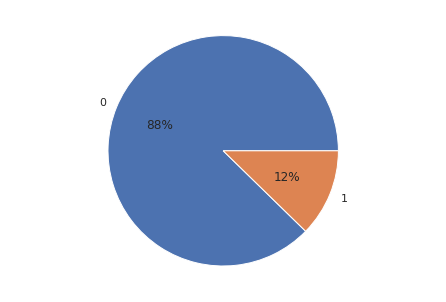

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['0', '1']
churn = df.Tertarik.value_counts()
ax.pie(churn,labels=labels,autopct='%.0f%%')
plt.show()

diketahui bahwa sebaran data secara kesuluruhan customer tidak tertarik, dengan detil Terterik sebanyak 12% dan Tidak Tertarik sebanyak 88%.

### Eksplorasi Variabel Numerik

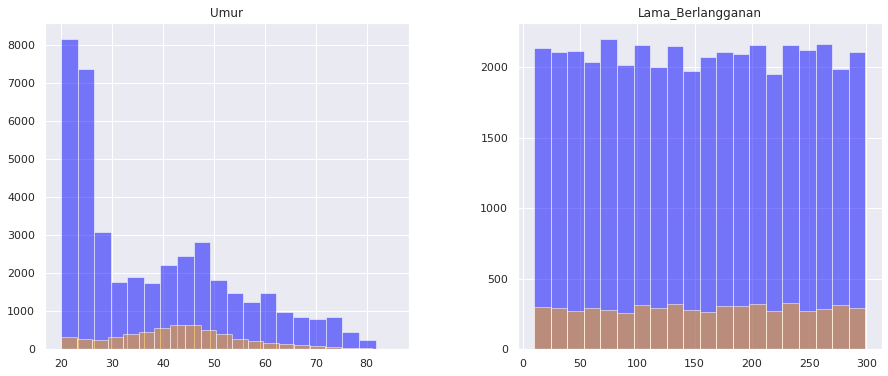

In [ ]:

#creating bin in chart
numerical_features = ['Umur','Lama_Berlangganan']
fig, ax = plt.subplots(1, 2,figsize=(15,6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df[df.Tertarik == 0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Tertarik == 1][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

Dapat kita ketahui bahwa untuk Umur ada kecenderungan semakin besar umurnya sama umur 40 dan sisanya semakin menurun, semakin kecil juga ketertarikan. Untuk Kanal_Penjualan terlihat tidak ada kecenderungan apapun terhadap ketertarikan customers.

### Eksplorasi Data Kategorik

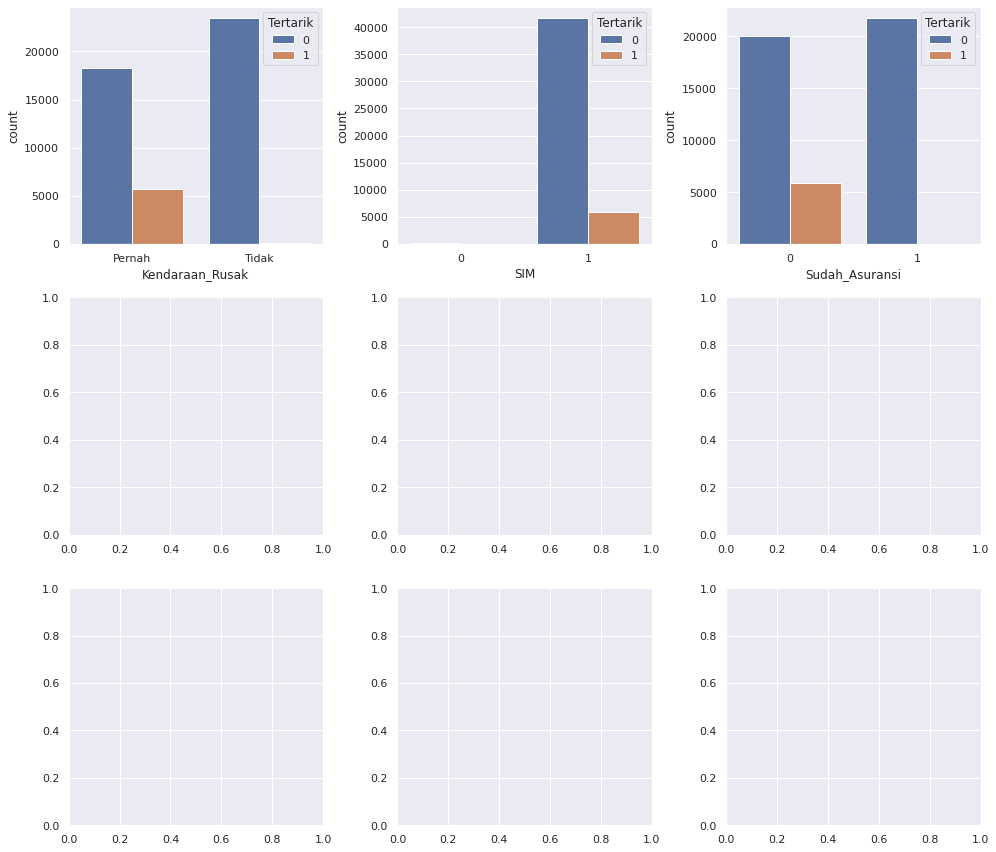

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df,x = 'Kendaraan_Rusak',hue='Tertarik', ax=ax[0][0])
sns.countplot(data=df,x = 'SIM',hue='Tertarik', ax=ax[0][1])
sns.countplot(data=df,x = 'Sudah_Asuransi', hue='Tertarik', ax=ax[0][2])
plt.tight_layout()
plt.show()

dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang tertarik dilihat dari faktor Kendaraan_Rusak. Akan tetapi ada kecenderungan bahwa orang yang tertarik adalah orang-orang yang statusnya adalah yang sudah belum memiliki asuransi

# **Data Preprocessing**

### Delete Unnecessary Columns

Tidak diperlukan

### Handle Duplicate

In [ ]:
#cek jumlah duplikasi
df.duplicated().sum()

3

In [ ]:
#hapus duplikasi
df.drop_duplicates(keep = False, inplace = True)

df.duplicated().sum()

0

### Encoding Data

In [ ]:
#Kendaraan Rusak
replace_data = {"Kendaraan_Rusak": {"Pernah": 1, "Tidak": 0}}
df.replace(replace_data, inplace=True)

#Jenis Kelamin
replace_gender={"Jenis_Kelamin": {"Pria": 1, "Wanita": 0}}
df.replace(replace_gender, inplace=True)

#Umur Kendaraan
replace_age = {"Umur_Kendaraan": {'< 1 Tahun' : 0, '1-2 Tahun' : 1, '> 2 Tahun' : 2 }}
df.replace(replace_age, inplace=True)

### Replace NaN

In [ ]:
#cek nilai NaN
df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
#mengisi nilai null dengan metode imputation
df['Umur'].fillna(df['Umur'].mean(), inplace=True)
df['SIM'].fillna(df['SIM'].mean(), inplace=True)
df['Kode_Daerah'].fillna(df['Kode_Daerah'].mean(), inplace=True)
df['Sudah_Asuransi'].fillna(df['Sudah_Asuransi'].mean(), inplace=True)
df['Premi'].fillna(df['Premi'].mean(), inplace=True)
df['Kanal_Penjualan'].fillna(df['Kanal_Penjualan'].mean(), inplace=True)
df['Lama_Berlangganan'].fillna(df['Lama_Berlangganan'].mean(), inplace=True)

df['Jenis_Kelamin'].fillna(df['Jenis_Kelamin'].mode()[0], inplace=True)
df['Umur_Kendaraan'].fillna(df['Umur_Kendaraan'].mode()[0], inplace=True)
df['Kendaraan_Rusak'].fillna(df['Kendaraan_Rusak'].mode()[0], inplace=True)

df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### Hapus Outlier

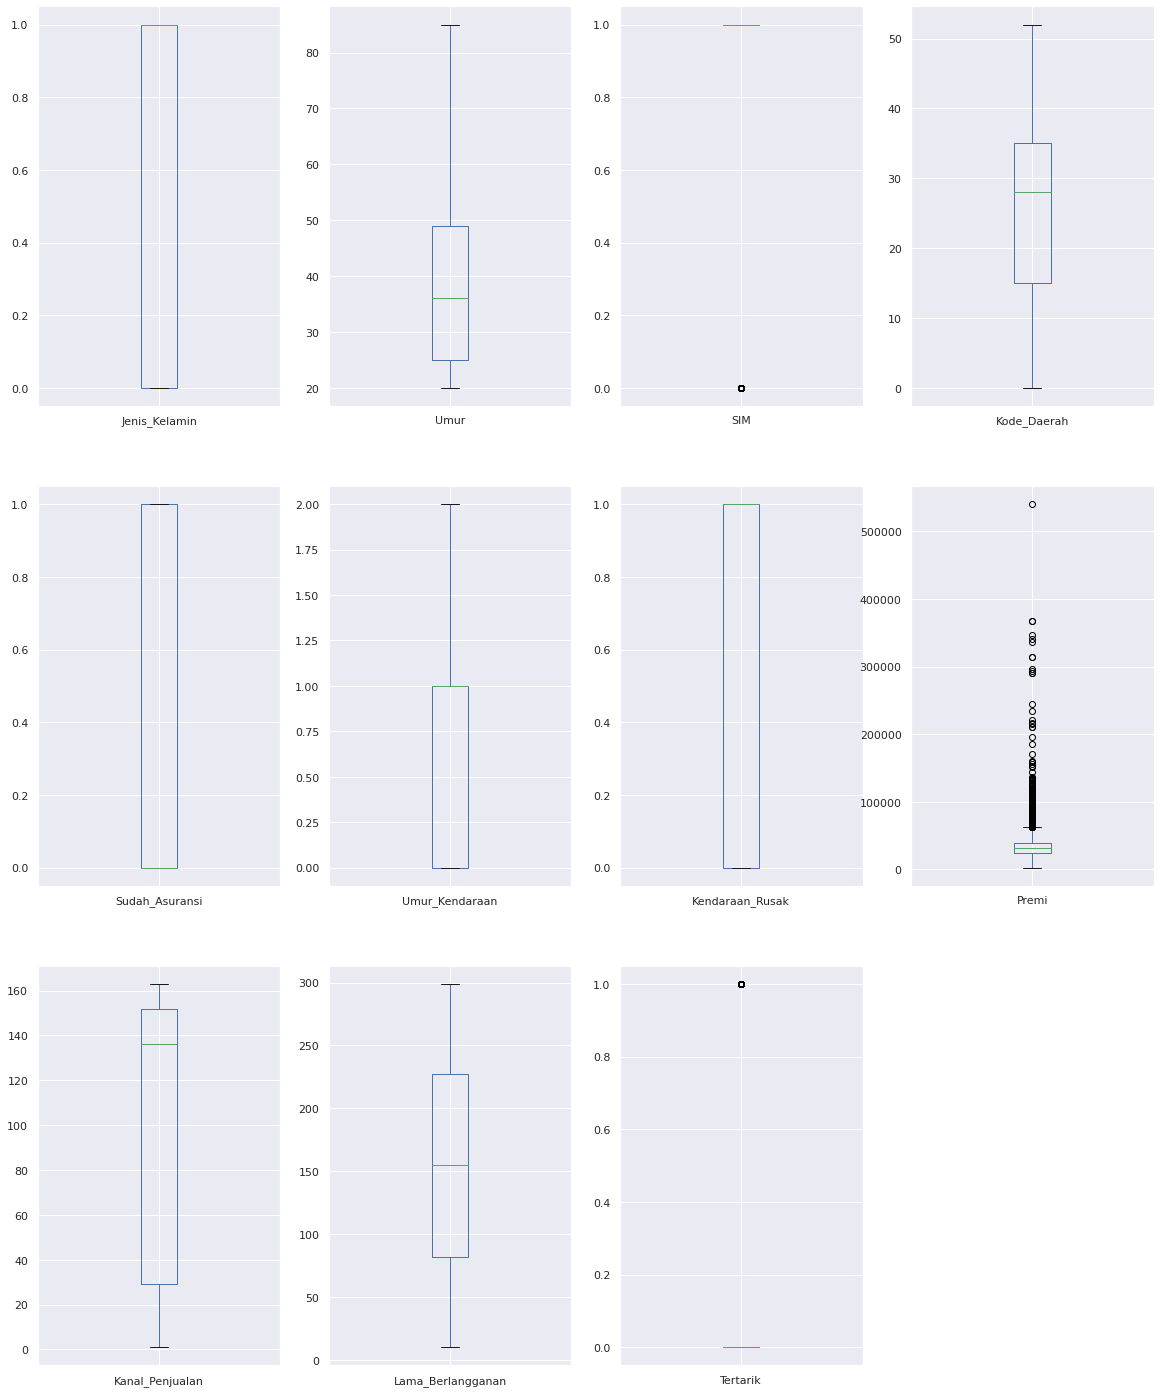

In [ ]:
#Melihat outlier setiap features dengan boxplot
df.plot(kind="box", subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(20,25))
plt.show()

In [ ]:
# finding the 1st quartile
q1 = np.quantile(df['Premi'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(df['Premi'], 0.75)
med = np.median(df['Premi'])

# finding the IQR
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

15076.0 62090.0 1786.0


In [ ]:
#Trimming
new_df = df[df['Premi'] < upper_bound]
new_df.shape
#Capping
new_df_cap = df.copy()
new_df_cap['Premi'] = np.where(
    new_df_cap['Premi'] > upper_bound,
    upper_bound,
    np.where(
        new_df_cap['Premi'] < lower_bound,
        lower_bound,
        new_df_cap['Premi']
    )
)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

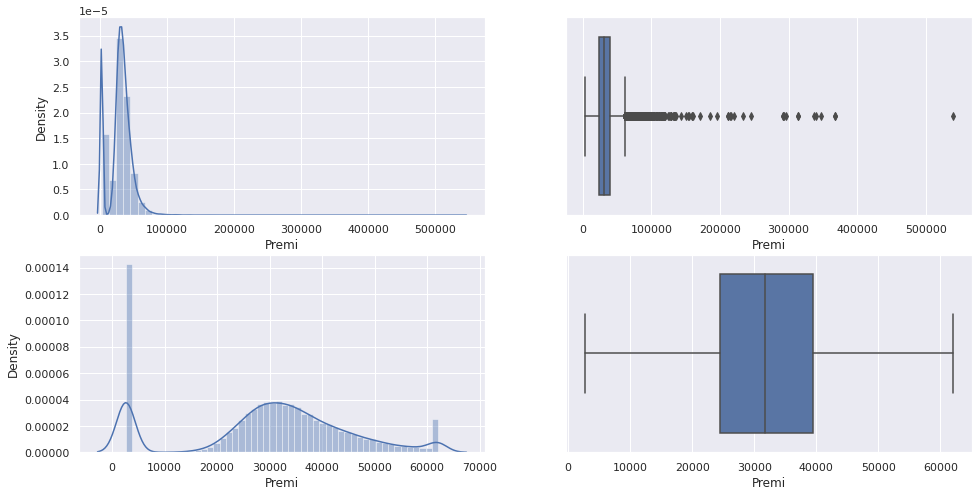

In [ ]:
#Perbandingan antara yang lama dengan baru
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Premi'])
plt.subplot(2,2,2)
sns.boxplot(df['Premi'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Premi'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Premi'])
plt.show()

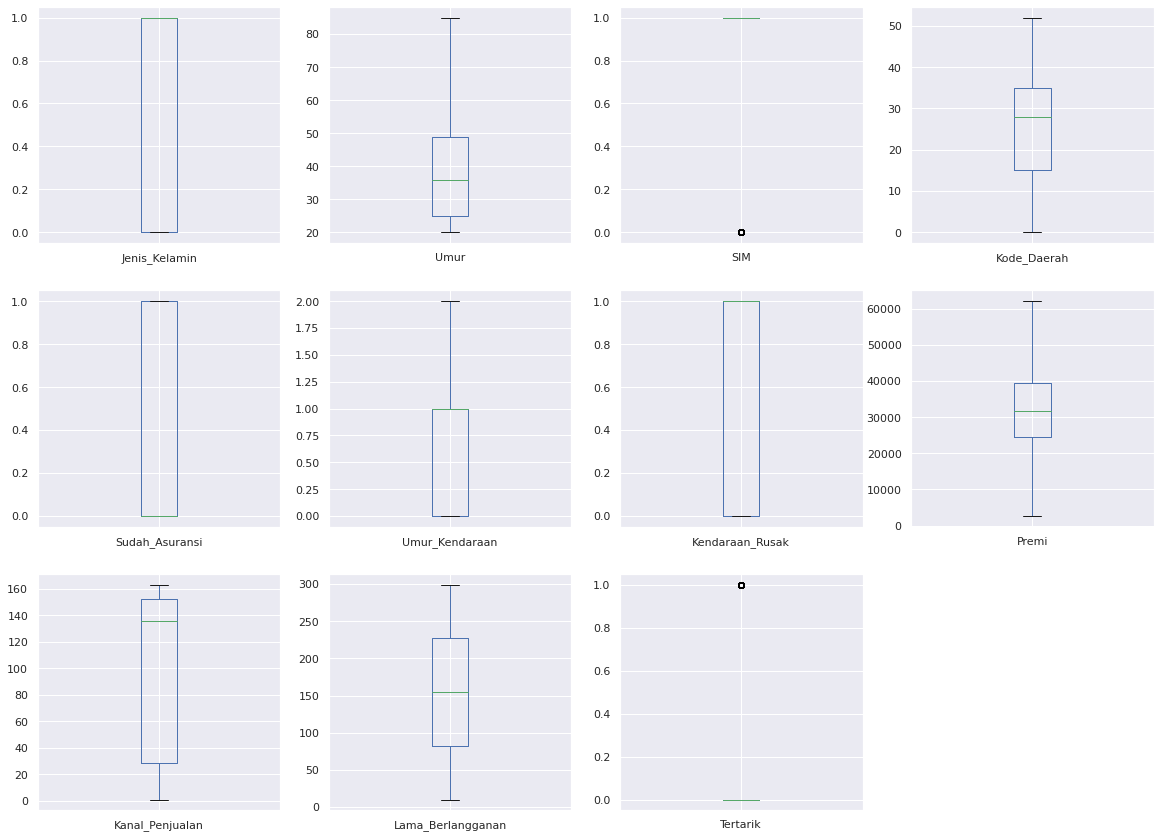

In [ ]:
new_df_cap.plot(kind="box", subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
plt.show()

### Split Data

In [ ]:
df = new_df_cap
for column in df.columns:
    if df[column].dtype == np.number: continue
    df[column] = LabelEncoder().fit_transform(df[column])

from sklearn.model_selection import train_test_split
# Predictor dan target
X = df.drop('Tertarik',axis=1)
y = df['Tertarik']
# Splitting train and test
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3 , random_state=42)
# Print according to the expected result
print('Jumlah Baris dan kolom dari x_train adalah:', x_train.shape,',sedangkan Jumlah baris dan kolom dari y_train adalah:',y_train.shape)
print('Prosentase Tertarik di data training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:',x_test.shape,',sedangkan Jumlah baris dan kolom dari y_test adalah:',y_test.shape)
print('Prosentase Tertarik di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah Baris dan kolom dari x_train adalah: (33343, 10) ,sedangkan Jumlah baris dan kolom dari y_train adalah: (33343,)
Prosentase Tertarik di data training adalah:
0    0.877725
1    0.122275
Name: Tertarik, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (14290, 10) ,sedangkan Jumlah baris dan kolom dari y_test adalah: (14290,)
Prosentase Tertarik di data Testing adalah:
0    0.875297
1    0.124703
Name: Tertarik, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


Setelah dianalisis lebih lanjut, ternyata ada kolom yang tidak dibutuhkuan dalam model, yaitu Id Number maka hal ini perlu dihapus. Kemudian kita lanjut mengubah value dari data yang masih berbentuk string menjadi numeric melalui encoding, setelah dilakukan terlihat di persebaran datanya khususnya kolom min dan max dari masing masing variable sudah berubah menjadi 0 & 1. Tahap terakhir adalah membagi data menjadi 2 bagian untuk keperluan modelling, setelah dilakukan terlihat dari jumlah baris dan kolom masing-masing data sudah sesuai & prosentase kolom Tertarik juga sama dengan data di awal, hal ini mengindikasikan bahwasannya data terpisah dengan baik dan benar.

# **PEMODELAN**

## Logistic Regression

### Pembuatan Model

In [ ]:
log_model=LogisticRegression().fit(x_train,y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


### Performansi Model Training - Menampilkan Metrics

In [ ]:
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     29266
           1       0.00      0.00      0.00      4077

    accuracy                           0.88     33343
   macro avg       0.44      0.50      0.47     33343
weighted avg       0.77      0.88      0.82     33343



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Performansi Model Training - Menampilkan Plots

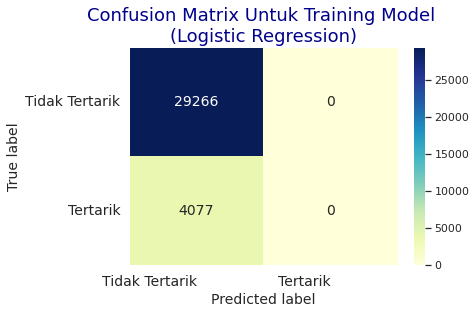

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)),('Tidak Tertarik', 'Tertarik') ,('Tidak Tertarik', 'Tertarik' ))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Untuk Training Model \n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Performansi Data Testing - Menampilkan Metrics

In [ ]:
sns.set(style='darkgrid')
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     12508
           1       0.00      0.00      0.00      1782

    accuracy                           0.88     14290
   macro avg       0.44      0.50      0.47     14290
weighted avg       0.77      0.88      0.82     14290



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Performansi Data Testing - Menampilkan Plots

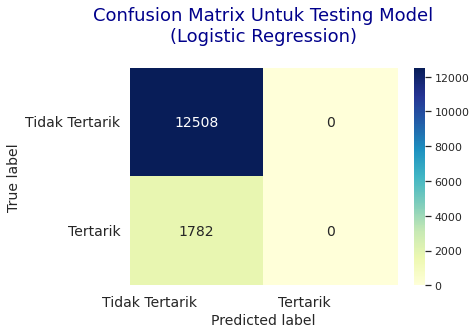

In [ ]:
sns.set(style='darkgrid')
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('Tidak Tertarik','Tertarik'),('Tidak Tertarik','Tertarik'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True,annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Untuk Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Dari hasil dan analisa di atas, maka:**

Jika kita menggunakan menggunakan algoritma logistic regression dengan

1.   Memanggil LogisticRegression() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
2.   Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 88%, dengan detil tebakan Tertarik yang sebenernya benar Tertarik adalah 0, tebakan tidak tertarik yang sebenernya tidak tertarik adalah 12508, tebakan tidak churn yang sebenernya benar churn adalah 1782 dan tebakan churn yang sebenernya tidak churn adalah 0.
3.   Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 88%, dengan detil tebakan tertarik yang sebenernya benar tertarik adalah 0, tebakan tidak tertarik yang sebenernya tidak tertarik adalah 29266, tebakan tidak tertarik yang sebenernya benar tertarik adalah 4077 dan tebakan tertarik yang sebenernya tidak tertarik adalah 0.







# **EKSPERIMEN**

## Model Random Forest Classifier

### Pembuatan Model

In [ ]:
#Train the model
rdf_model = RandomForestClassifier().fit(x_train,y_train)
print(rdf_model)

RandomForestClassifier()


### Performansi Model Training - Menampilkan Metrics

In [ ]:
rdf_model = RandomForestClassifier().fit(x_train, y_train)
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29266
           1       1.00      1.00      1.00      4077

    accuracy                           1.00     33343
   macro avg       1.00      1.00      1.00     33343
weighted avg       1.00      1.00      1.00     33343



### Performansi Model Training - Menampilkan Plots

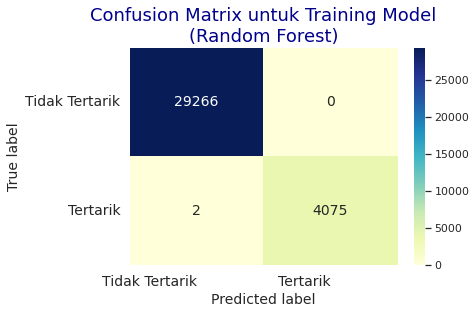

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Tidak Tertarik', 'Tertarik'), ('Tidak Tertarik', 'Tertarik'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Performansi Data Testing - Menampilkan Metrics

In [ ]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     12508
           1       0.37      0.09      0.14      1782

    accuracy                           0.87     14290
   macro avg       0.63      0.53      0.54     14290
weighted avg       0.82      0.87      0.83     14290



### Performansi Data Testing - Menampilkan Plots

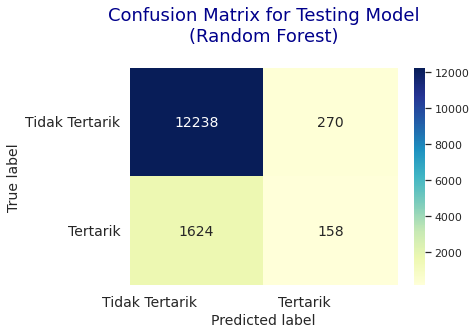

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('Tidak Tertarik', 'Tertarik'), ('Tidak Tertarik', 'Tertarik'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Kesimpulan

**Dari hasil dan analisa di atas, maka:**


*   Jika kita menggunakan menggunakan algoritma Random Forest dengan memanggil RandomForestClassifier() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.

*   Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 100%, dengan detil tebakan Tertarik yang sebenernya benar Tertarik adalah 4075, tebakan tidak Tertarik yang sebenernya tidak Tertarik adalah 29266, tebakan tidak Tertarik yang sebenernya benar Tertarik adalah 2 dan tebakan Tertarik yang sebenernya tidak Tertarik adalah 0.

*   Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 87%, dengan detil tebakan Tertarik yang sebenernya benar Tertarik adalah 158, tebakan tidak tertarik yang sebenernya tidak tertarik adalah 12238, tebakan tidak tertarik yang sebenernya benar tertarik adalah 1624 dan tebakan tertarik yang sebenernya tidak tertarik adalah 270.

## Model Random Gradient Boosting Classifier

### Pembuatan Model

In [ ]:
#Train the model
#Train the model
gbt_model=GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


### Performansi Model Training - Menampilkan Metrics

In [ ]:
gbt_model = RandomForestClassifier().fit(x_train, y_train)
y_train_pred = gbt_model.predict(x_train)
print('Classification Report Training Model Gradient Boosting):')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model Gradient Boosting):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29266
           1       1.00      1.00      1.00      4077

    accuracy                           1.00     33343
   macro avg       1.00      1.00      1.00     33343
weighted avg       1.00      1.00      1.00     33343



### Performansi Model Training - Menampilkan Plots

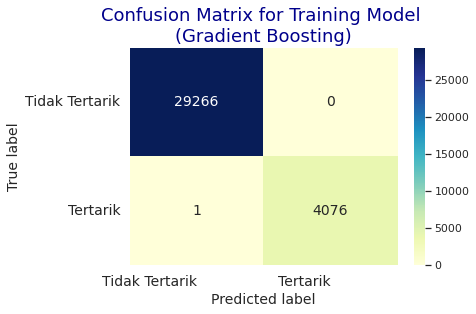

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('Tidak Tertarik', 'Tertarik'), ('Tidak Tertarik', 'Tertarik'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model \n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Performansi Data Testing - Menampilkan Metrics

In [ ]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     12508
           1       0.35      0.09      0.15      1782

    accuracy                           0.87     14290
   macro avg       0.62      0.53      0.54     14290
weighted avg       0.82      0.87      0.83     14290



### Performansi Data Testing - Menampilkan Plots

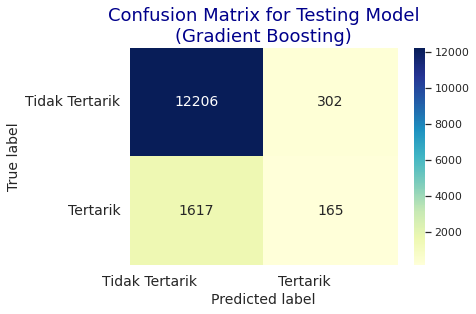

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('Tidak Tertarik', 'Tertarik'), ('Tidak Tertarik', 'Tertarik'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Kesimpulan

**Dari hasil dan analisa di atas, maka:**


*   Jika kita menggunakan menggunakan algoritma Gradient Boosting dengan memanggil GradientBoostingClassifier() dari package sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.

*   Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 100%, dengan detil tebakan Tertarik yang sebenernya benar Tertarik adalah 165, tebakan tidak Tertarik yang sebenernya tidak Tertarik adalah 29266, tebakan tidak Tertarik yang sebenernya benar Tertarik adalah 1 dan tebakan Tertarik yang sebenernya tidak Tertarik adalah 0.

*   Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 87%, dengan detil tebakan Tertarik yang sebenernya benar Tertarik adalah 165, tebakan tidak Tertarik yang sebenernya tidak Tertarik adalah 12206, tebakan tidak Tertarik yang sebenernya benar Tertarik adalah 1617 dan tebakan Tertarik yang sebenernya tidak Tertarik adalah 302.

# **EVALUASI**

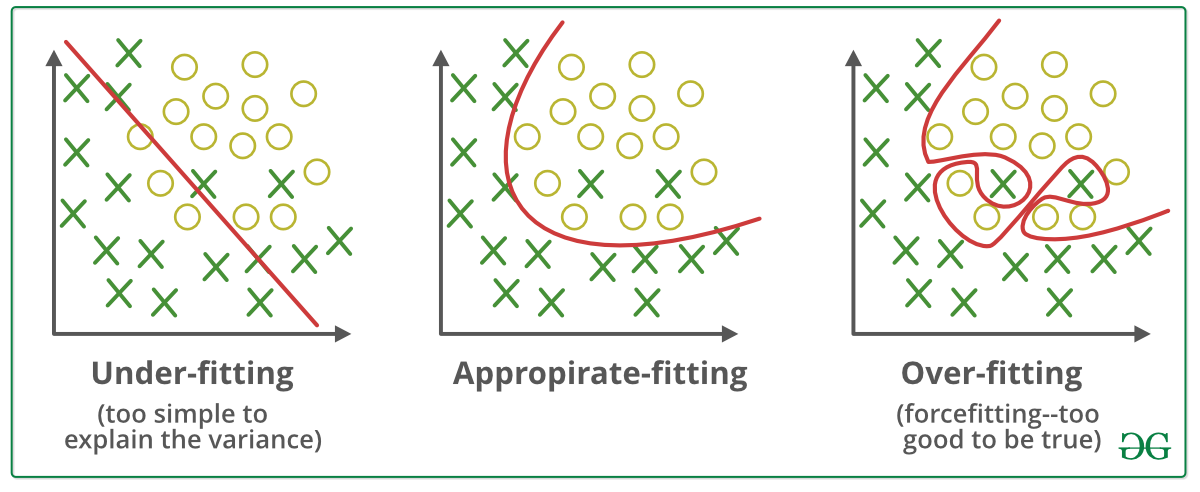

Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan  Gradient Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 80%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.